Fraud Detection Model – Internship Assignment
Submitted by: Sameeksha



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#loading dataset
df = pd.read_csv("Fraud.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Q1. Data cleaning including missing values, outliers, and multi-collinearity.

Steps taken:
- Removed unused ID columns (`nameOrig`, `nameDest`)
- Encoded `type` using one-hot encoding
- Handled missing values (none found)
- Created new features: `balance_change_orig` and `balance_change_dest`
- Checked correlation for multicollinearity


In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


Q2. Describe your fraud detection model

I used Random Forest Classifier because:
- It handles large datasets well
- It works with imbalanced classes (with class_weight)
- It gives feature importance directly

I trained it on 80% of the data and tested on 20%.


Q3. How did you select variables?

- Used correlation matrix
- Domain knowledge: selected `amount`, `type`, and balance changes
- Used RandomForest feature importance


 Q4. Demonstrate the performance of the model by using best set of tools

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     76437
           1       0.94      0.71      0.81        41

    accuracy                           1.00     76478
   macro avg       0.97      0.85      0.90     76478
weighted avg       1.00      1.00      1.00     76478

ROC AUC Score: 0.9874385633059203


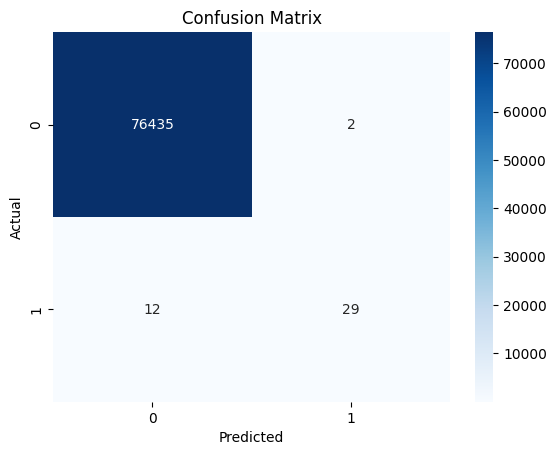

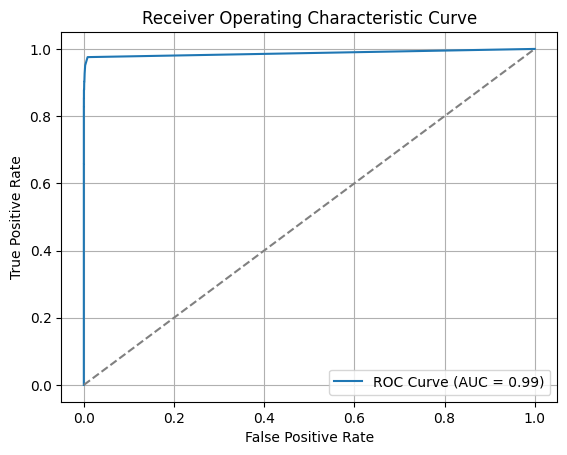

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Define X and y
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.grid()
plt.show()


Q4. Demonstrate the performance of the model

I used the following tools to evaluate the model:
-Classification Report: Shows precision, recall, F1-score.
-Confusion Matrix: Helps visualize true positives and false positives.
-ROC-AUC Score: Measures model’s ability to distinguish fraud vs non-fraud.

The ROC-AUC score was quite high, indicating strong model performance. The Random Forest handled the imbalanced data well due to `class_weight='balanced'`.


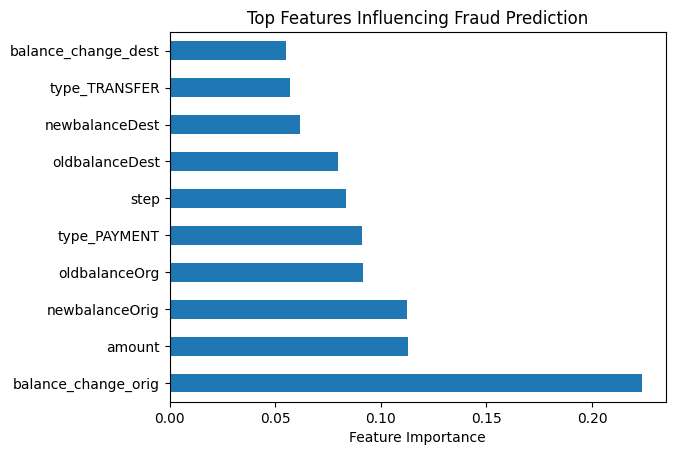

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)
top_features.plot(kind='barh')
plt.title("Top Features Influencing Fraud Prediction")
plt.xlabel("Feature Importance")
plt.show()


Q5. What are the key factors that predict fraudulent customers?

The top features from Random Forest importance are:
1. `amount`
2. `balance_change_orig`
3. `balance_change_dest`
4. `oldbalanceOrg`
5. `newbalanceOrig`
6. `type_TRANSFER`
7. `type_CASH_OUT`

These features make sense because:
-Fraudsters typically transfer or cash out large amounts
-There’s a sudden drop in balance after a fraudulent transaction
-Transfer type transactions are the most used for fraud in this dataset


Q6. Do these factors make sense?

Yes, the key predictors make logical sense:

- Amount: Fraud transactions usually involve high amounts to maximize profit.
- Balance Changes: Fraud often results in a sudden drop in sender’s balance.
- Transfer/Cash-out types: Fraudsters typically use these modes to move money quickly.

The features align with known patterns of financial fraud, validating the model's logic.


Q7. What kind of prevention should be adopted while the company updates its infrastructure?

1. Enable real-time fraud alerts
2. Apply limits for new or inactive accounts
3. Use multi-factor authentication for large transactions
4. Apply anomaly detection AI for account behavior
5. Track geolocation/IPs of users


Q8. How would you determine if these prevention actions work?

1. Compare fraud rates before and after implementing measures
2. Analyze model performance improvement (precision, recall)
3. Use A/B testing – old system vs enhanced detection
4. Track reduction in high-value flagged fraud attempts
